In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [19]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv(r'C:\Users\Predator\Downloads\diabetes.csv')

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
X = df[['SkinThickness', 'Insulin', 'BMI']]

In [35]:
X

,SkinThickness,Insulin,BMI
0,35,0,33.6
1,29,0,26.6
2,0,0,23.3
3,23,94,28.1
4,35,168,43.1
...,...,...,...
763,48,180,32.9
764,27,0,36.8
765,23,112,26.2
766,0,0,30.1


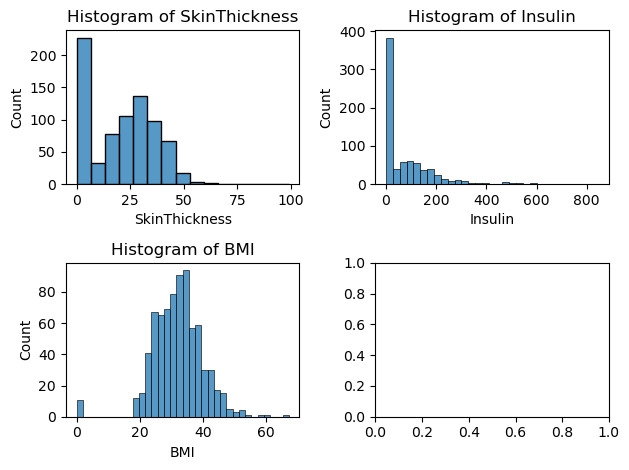

In [39]:
fig, axs = plt.subplots(2, 2)

# Flatten the subplots array into a 1D array
axs = axs.ravel()

# Iterate over the columns of the X DataFrame and their corresponding subplot axes
for i, col in enumerate(X.columns):
    # Plot a histogram of the current column on the corresponding subplot axis
    sns.histplot(X[col], ax=axs[i])
    
    # Set the title of the subplot to indicate the column name
    axs[i].set_title('Histogram of ' + col)


plt.tight_layout()
plt.show()

In [45]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the data using the fit_transform method
X_scaled = scaler.fit_transform(X)

C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

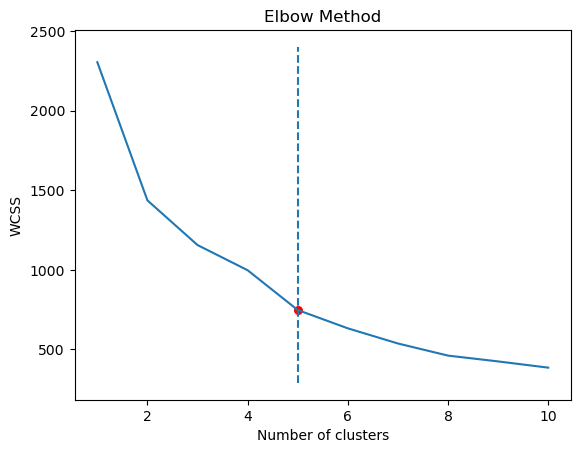

In [49]:
# compute WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot WCSS vs no. of clusters
sns.lineplot(x=range(1, 11), y=wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# find the knee location
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

# plot the knee location
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.scatter(knee.knee, knee.knee_y, color='red', s=30)

plt.show()

In [53]:
# Instantiate a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-means model to the scaled data and obtain the cluster labels for each data point
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\Predator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [59]:
# add the cluster labels to the original data
df['cluster'] = y_kmeans

In [63]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,2
765,5,121,72,23,112,26.2,0.245,30,0,2
766,1,126,60,0,0,30.1,0.349,47,1,1


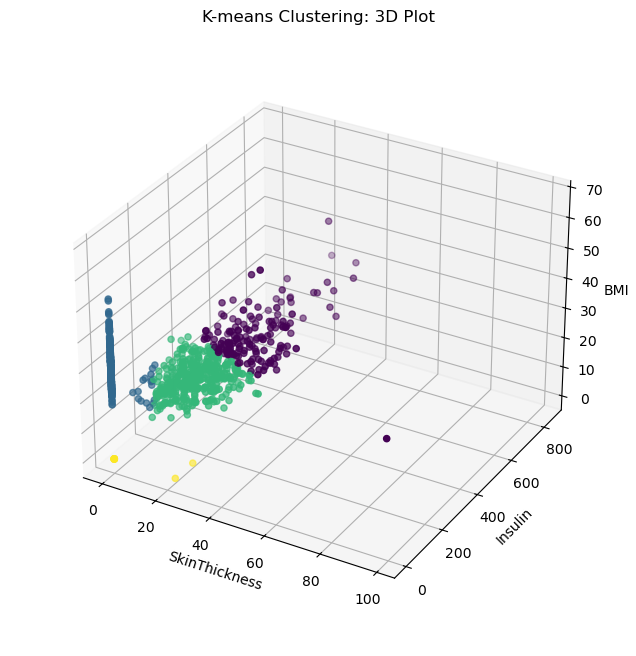

In [69]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot of the data points
ax.scatter3D(df['SkinThickness'], df['Insulin'], df['BMI'], c=df['cluster'], cmap='viridis')

# Set labels for each axis
ax.set_xlabel('SkinThickness')
ax.set_ylabel('Insulin')
ax.set_zlabel('BMI')

# Set a title for the plot
plt.title('K-means Clustering: 3D Plot')

ax.set_box_aspect(aspect=None, zoom=0.9)
plt.show()